In [16]:
import pandas as pd
import difflib
import networkx as nx
import matplotlib.pyplot as plt
from rapidfuzz import fuzz

In [17]:
ruta_archivo = "Dataset_Form_Abril.xlsx"
df = pd.read_excel(ruta_archivo)

In [18]:
def normalizar(nombre):
    if pd.isna(nombre):
        return ""
    return " ".join(nombre.strip().upper().split())

In [20]:
colabs = {}
puestos = {}
for _, row in df.iterrows():
    nombre = normalizar(row["NOMBRES_COLABORADORES"])
    cedula = str(row["CED"]).strip()
    puesto = str(row["PUESTO"]).strip().upper() if not pd.isna(row["PUESTO"]) else ""
    colabs[nombre] = cedula
    puestos[nombre] = puesto

In [21]:
relaciones=[]

In [22]:
relaciones=[]
for _, row in df.iterrows():
    declarante = normalizar(row["NOMBRES_COLABORADORES"])
    cedula_decl = str(row["CED"]).strip()

    
    for i in range(1, 5):
        pariente = normalizar(row.get(f"NOMBRES PARIENTE {i}", ""))
        grado = str(row.get(f"GRADO DE PARENTESCO {i}", "")).strip().upper()
        
        
        if pariente and pariente != "NAN":
            relaciones.append({
                "DECLARANTE": declarante,
                "CED_DECLARANTE": cedula_decl,
                "PARIENTE": pariente,
                "GRADO": grado
            })

In [31]:
# Buscar inconsistencias
inconsistencias = []
for r in relaciones:
    a = r["DECLARANTE"]
    b = r["PARIENTE"]
    grado = r["GRADO"]
    
   
    posibles = difflib.get_close_matches(b, colabs.keys(), n=1, cutoff=0.85)
    if posibles:
        b_real = posibles[0]
        reciproco = any(
            (r2["DECLARANTE"] == b_real and difflib.SequenceMatcher(None, r2["PARIENTE"], a).ratio() > 0.85)
            for r2 in relaciones
        )
        if not reciproco:
            puesto_a = puestos.get(a, "")
            puesto_b = puestos.get(b_real, "")
            # Evaluar riesgo por grado de parentesco
            cargos_alto_riesgo = {
                "GERENTE DE AUDITORIA INTERNA", "GERENTE DE I&D PROYECTOS Y SOSTENIBILIDAD", "COORDINADOR CONTROL PROCESO HABILAC", "COORDINADOR CONSOLIDACION FINANCIERA", "GERENTE DE INVESTIGACION & DESARROLLO",
                "COORDINADOR DE SISTEMAS DE GESTION", "COORDINADOR DE CALIDAD", "JEFE DE PROYECTOS", "GERENTE DE NEGOCIOS ESTRATEGICOS", "COORDINADOR DE MARKETING DIGITAL",
                "COORDINADOR MANTENIMIENTO MECANICO", "JEFE DE MARCA BLANCA", "COORDINADOR CONTABLE", "JEFE DE INVESTIGACION & DESARROLLO", "COORDINADOR SISTEMA DE GESTION",
                "JEFE DE LOGISTICA", "COORDINADOR OLEOQUIMICA", "GERENTE IMPUESTOS", "JEFE DE FINANZAS CORPORATIVAS", "COORDINADOR DE EGRESOS",
                "GERENTE DE FINANZAS CORPORATIVAS", "COORDINADOR PLANEACION FINANCIERA", "JEFE SISTEMA GESTION M & S", "GERENTE GENERAL", "COORDINADOR ADMINISTRATIVO",
                "GERENTE ADMINISTRATIVO", "COORDINADOR MANT. ELECTRICO", "GERENTE DE I&D ABSORBENTES", "COORDINADOR INVESTIGACION DE MERCADOS", "JEFE DESARROLLO DE NEGOCIOS",
                "GERENTE DE DIVISIÓN HOME CARE", "GERENTE FINANCIERO", "COORDINADOR DISENO INDUSTRIAL", "COORDINADOR DESARROLLO DE NEGOCIOS", "GERENTE COMERCIAL PANIFICACION & HORECA",
                "GERENTE DE VENTAS", "GERENTE DE PROYECTOS & TRANSFERENCIA TECNOLOGICA", "GERENTE T. I.", "JEFE ELECTROINDUSTRIAL", "JEFE DE PROCESOS PLANTA",
                "JEFE DE COMPENSACIONES", "GERENTE DE PLANIFICACION", "JEFE DE PLANTA PROCESO PELLETS", "JEFE TRADE MARKETING", "JEFE DE MONITOREO Y SEGURIDAD FISICA",
                "JEFE DE SANIDAD Y FERTILIZACION", "JEFE DE LOGISTICA E INFRAESTRUCTURA", "JEFE DE BODEGA", "GERENTE FINANCIERO / ADMINISTRATIVO", "JEFE DIVISION",
                "JEFE DE INVESTIGACION Y DESARROLLO", "JEFE DE PLANTACION", "JEFE DE JARDINERIA CASA CLUB", "GERENTE DE CALIDAD", "COORDINADOR SSFF",
                "JEFE DE MANTENIMIENTO CANCHA DE GOLF/JARDINERIA", "COORDINADOR DE RUTAS COMERCIALES", "GERENTE DE INVESTIGACION Y DESARROLLO", "COORDINADOR DE IMPUESTO", "COORDINADOR DE SEGUROS",
                "DIRECTOR DE FINANZAS Y ADMINISTRACION", "DIRECTOR DE MARKETING B2C", "ADMINISTRADOR", "DIRECTOR DE INVESTIGACION & DESARROLLO", "DIRECTOR DE PROYECTOS",
                "PRESIDENTE DEL DIRECTORIO GRUPO LA FABRIL", "ADMINISTRADOR CENTRO ACOPIO M. PRIMA", "GUARDIA ADMINISTRATIVO", "DIRECTOR DE CADENA DE SUMINISTROS", "DIRECTOR COMERCIAL B2B",
                "ADMINISTRADOR Y PROGRAMDOR  SISTEMA DYNAMICS", "ADMINISTRADOR DE HOTEL", "DIRECTOR DE TALENTO HUMANO", "MIEMBRO DE COMITÉ DE AUDITORÍA", "MIEMBRO DE COMITÉ DE DESARROLLO ORGANIZACIONAL",
                "MIEMBRO DE COMITÉ HOLDING LA FABRIL", "MIEMBRO DE COMITÉ HOLDING MONTECRISTI", "KAM INDUSTRIAS", "AUDITOR", "KAM",
                "ABOGADO", "ABOGADO SENIOR", "KAM SR", "AUDITOR SR", "GERENTE","COORDINADOR DE PLANTA","GERENTE DE ADQUISICIONES","GERENTE DE TALENTO HUMANO"
            }

            cargos_medio_riesgo = {
                "ANALISTA CONTABLE DE IMPORTACIONES", "ANALISTA SR ADMINISTRACION DE VENTAS", "ANALISTA ADMINISTRACION DE VENTAS", "ANALISTA DE PROYECTOS", "SUPERVISOR LOGISTICO",
                "SUPERVISOR DISTRIBUIDORES", "SUPERVISOR DE VENTAS", "ANALISTA DE GESTION ADUANERA Y LOGISTICA", "INGENIERO ANALISIS INSTRUMENTAL", "ANALISTA FINANCIERO SR",
                "ANALISTA DE LOGISTICA Y DISTRIBUCION", "OPERADOR TECNICO DE SERVICIOS INDUSTRIALES", "ANALISTA DE CALIDAD", "ANALISTA INTELIGENCIA DE MERCADO", "ANALISTA DE SOPORTE FUNCIONAL",
                "SUPERVISOR DE SEGURIDAD FÍSICA", "ANALISTA DE DATOS", "ANALISTA DE EXCELENCIA OPERATIVA", "ANALISTA DE SERVICIO AL CLIENTE", "SUPERVISOR DE VENTAS CANAL ESPECIALIZADO",
                "ANALISTA PLANEACION FINANCIERO Y PRESUPUESTO", "ASESOR TECNICO", "ANALISTA BI Y MACHINE LEARNING", "ANALISTA DE SEGURIDAD INDUSTRIAL", "ANALISTA FINANCIERO JR",
                "ANALISTA GERENCIA EGRESOS HOLDING", "ANALISTA EGRESOS SERVICIOS GENERALES", "ANALISTA DE COSTO", "ANALISTA CUENTAS POR PAGAR MAT. PRIMAS", "ANALISTA ADMINISTRATIVO",
                "ANALISTA COSTOS SR", "TECNICO INVESTIGACION Y DESARROLLO", "ANALISTA CONTABLE", "TECNICO ENFERMERIA", "AUXILIAR ARCHIVO",
                "ANALISTA CONTROL DE PROCESOS TTHH", "ANALISTA DE CREDITO & COBRANZA", "ANALISTA DE IMPUESTOS", "ANALISTA INDUSTRIAL A&G", "SUPERVISOR DE EJECUCION TRADICIONAL",
                "SUPERVISOR DE EJECUCION MODERNO", "ANALISTA LABORATORIO AGUAS & CRUDOS", "ANALISTA TALENTO HUMANO", "ANALISTA JR DE INTELIGENCIA DE MERCADO", "ANALISTA DE TRANSFORMACIÓN ORGANIZACIONA",
                "ANALISTA ADMINISTRATIVA B2C", "TECNICO CENTRO DE MECANIZADO", "ANALISTA DE MARKETING", "SUPERVISOR DE CAJAS", "ANALISTA DE CONTROL DE ACCESOS",
                "TECNICO MANTENIMIENTO PREDICTIVO", "ANALISTA DE SISTEMAS DE GESTION", "ANALISTA TRADE MARKETING", "TECNICO 1", "SUPERVISOR SENIOR EXPORTACIONES",
                "SUPERVISOR DE TURNO", "SUPERVISOR DE SSGG", "ANALISTA DE MATERIA PRIMA Y CONTROL DE ARCHIVO", "TECNICO REFRIGERACION", "FORMULADOR ANALISTA PERSONAL CARE",
                "AUXILIAR DE ENFERMERIA", "TECNICO DE PROCESOS", "ANALISTA DE TALENTO HUMANO", "TECNICO RESPONSABLE DE SEGURIDAD INDUSTRIAL", "ANALISTA DE DESARROLLO ORGANIZACIONAL",
                "TECNICO ASESOR AGRICOLA", "ANALISTA DE MATERIAS PRIMAS Y VENTAS", "SUPERVISOR EN IMPLEMENTACIÓN DE CERTIFICACIONES", "AUXILIAR DE LABORATORIO", "ASESOR TECNICO DE PLANTACIONES",
                "AUXILIAR DE LIMPIEZA", "ANALISTA DE PROYECTOS DE INGENIERIA", "SUPERVISOR PLANTA PELLET", "TECNICO MECANICO", "AUXILIAR SSO",
                "ANALISTA DE SISTEMAS", "ANALISTA DE NOMINA", "TECNICO SEGURIDAD INDUSTRIAL", "ANALISTA DE INVENTARIO", "ANALISTA EGRESOS PROVEEDORES PUBLICIDAD Q.E.",
                "SUPERVISOR DE POLINIZACION", "SUPERVISOR DE FERTILIZACION", "TECNICO AGRICOLA", "ANALISTA T.I.", "AUXILIAR EN SERVICIO GENERALES",
                "AUXILIAR EN SERVICIOS GENERALES", "SUPERVISOR DE SANIDAD", "SUPERVISOR DE VIVERO", "SUPERVISOR SEGURIDAD FISICA", "AUXILIAR DE AREAS PUBLICAS",
                "ASESOR TECNICO AGRICOLA", "SUPERVISOR DE EQUIPO CAMINERO", "ANALISTA DE PLANIFICACION COMERCIAL", "ANALISTA DE SELECCION", "SUPERVISOR DE PRODUCCIÓN",
                "ESPECIALISTA DE INVESTIGACION", "INGENIERO DE EMPAQUE", "VENDEDOR CANAL ESPECIALIZADO JR", "ESPECIALISTA SISTEMAS DE GESTION", "INGENIERO INVESTIGACION Y DESARROLLO",
                "INGENIERO DE DATOS", "ESPECIALISTA ADUANERO", "ESPECIALISTA DE DESARROLLO DE PRODUCTOS", "ESPECIALISTA DE SEGURIDAD DE INFORMACION", "ESPECIALISTA DE COMPRAS",
                "ESPECIALISTA EN PROCESOS A&G", "INGENIERO DE SOFTWARE FULL STACK", "INGENIERO DE INFRAESTRUCTURA", "INGENIERO DE OPERACIONES", "INGENIERO DE PROCESOS",
                "ESPECIALISTA DE SERVICIO AL CLIENTE", "ESPECIALISTA MANTENIMIENTO PLASTICOS", "INGENIERO PLANTA TRATAMIENTO", "ESPECIALISTA DE DESARROLLO DE CANALES", "INGENIERO PROYECTOS",
                "ESPECIALISTA SSTMA", "ESPECIALISTA DE PROYECTOS Y SOSTENIBILID", "INGENIERO DE PROCESOS SENIOR", "INGENIERO SSTMA", "INGENIERO DE DISENO MECANICO HIDRAULICO",
                "ESPECIALISTA CUALITATIVO ESTUDIO MERCADO", "INGENIERO DE PROYECTOS DE PRODUCCION", "ESPECIALISTA DE COMPENSACIONES", "VENDEDOR CANAL ESPECIALIZADO", "ESPECIALISTA DESARROLLO ORGANIZACIONAL",
                "ESPECIALISTA EN GESTION DE DATOS", "ESPECIALISTA DESARROLLO NEGOCIOS", "INGENIERO DISENO ELECTRICO", "ESPECIALISTA MECANICO", "INGENIERO DE PROYECTOS",
                "INGENIERO RESIDENTE DE OBRAS", "ESPECIALISTA DE SELECCION", "ESPECIALISTA DE DISTRIBUCION", "ESPECIALISTA RGM", "GESTOR DE LOGISTICA Y EXPORTACIONES",
                "VENDEDOR MAYORISTA", "VENDEDOR DETALLISTA", "MEDICO", "VENDEDOR VDA", "CONSULTOR SAP FUNCIONAL",
                "CONSULTOR DE TALENTO HUMANO", "ELECTRICISTA", "CONSULTOR SAP ABAP", "GESTOR DE CALIDAD", "VENDEDOR VDI",
                "GESTOR EXPERIENCIA DE CLIENTE", "VENDEDOR VACACIONISTA", "ASESOR DE VENTAS", "GESTOR DE DOCUMENTACION", "TRABAJADOR (A) SOCIAL",
                "VENDEDOR HRC", "VENDEDOR PNF", "VENDEDOR KAM", "TRABAJADORA SOCIAL", "ELECTROINDUSTRIAL",
                "MEDICO PLANTA", "ASISTENCIA MANTENIMIENTO EXTRACTORA", "ELECTROMECANICO", "MEDICO MATRIZ", "ASIST CONTABLE",
                "ASIST. MECANICA", "MEDICO OCUPACIONAL", "ASESOR COMERCIAL INMOBILIARIO", "ASESORA COMERCIAL DE EVENTOS Y BANQUETES", "VENDEDOR AUTOSERVICIOS",
                "ELECTRICO", "TRABAJADOR SANIDAD VEGETAL", "TRABAJADOR I&D"
            }



            cargos_bajo_riesgo = {
                "ASISTENTE DESARROLLO DE NEGOCIOS", "ASISTENTE SERVICIOS GENERALES", "ASISTENTE CARTERA AGENCIA", "ASISTENTE DE ALMACEN", "ASISTENTE DE CONTROL DE ACCESOS",
                "ASISTENTE ADMINISTRATIVO", "ASISTENTE DE DIRECCION", "ASISTENTE MAT PRIMA & LOGISTICA", "ASISTENTE EGRESOS", "ASISTENTE DE DATOS MAESTROS",
                "ASISTENTE DE LOGISTICA", "ASISTENTE DE SEGURIDAD ADMINISTRATIVA", "ASISTENTE LOGISTICA EXPORTACIONES", "ASISTENTE DE MANTENIMIENTO", "ASISTENTE DE MARCA BLANCA",
                "ASISTENTE GERENCIA GENERAL", "ASISTENTE DE PRESIDENCIA", "ASISTENTE DE PLANIFICACION COMERCIAL", "ASISTENTE DE GERENCIA EGRESOS", "ASISTENTE CONTABLE",
                "ASISTENTE DE IMPUESTOS", "ASISTENTE DE LOGISTICA Y DISTRIBUCION", "ASISTENTE PLANEACION FINANCIERO Y PRESUPUESTO", "ASISTENTE DE DATOS", "ASISTENTE COBRANZAS",
                "ASISTENTE ARCHIVO", "ASISTENTE CREDITO & COBRANZA", "ASISTENTE DE MONITOREO", "ASISTENTE CONTABLE DE EGRESOS", "ASISTENTE FINANCIERA GENERAL",
                "ASISTENTE DE MICROBIOLOGIA", "ASISTENTE GERENCIA", "MENSAJERO ADMINISTRATIVO", "ASISTENTE CONTABLE-RECEPCIONISTA", "ASISTENTE DE OFICINA",
                "ASISTENTE AGRICOLA", "ASISTENTE DE ADQUISICIONES DE EQUIPOS Y MATERIALES", "OPERARIO DE PLANTA INDUSTRIAL", "ASISTENCIA MANTENIMIENTO EXTRACTORA", "ASISTENTE DE BODEGA",
                "ASISTENTE DE PROYECTOS Y PROCESOS", "ASISTENTE DE COMPRAS", "ASISTENTE SISTEMAS", "OPERARIO PISCINA DE OXIDACIÓN", "ASISTENTE TÉCNICO DE CERTIFICACIONES",
                "OPERARIO PISCINAS OXIDACION", "OPERARIO DE PLANTA", "ASISTENTE GERENCIA ADMINISTRATIVA","OPERARIO PLANTA DE PELLET", "ASISTENTE DE BASCULA", "ASISTENTE DE TELECOMUNICACIONES", "ASISTENTE PLANTACION", "ASISTENTE DE GESTION DOCUMENTAL Y ARCHIVO",
                "ASISTENTE DE MARKETING", "ASISTENTE CONTABILIDAD", "ASISTENTE DE DIGITACION", "ASISTENTE PROYECTOS INDUSTRIALES", "ASISTENTE DE SANIDAD VEGETAL",
                "ASISTENTE DE MANTENIMIENTO LOGISTICA Y TALLER", "ASISTENTE DE SEGURIDAD OCUPACIONAL", "ASISTENTE DE FERTILIZACION", "ASISTENTE INVESTIGACION Y DESARROLLO", "ASISTENTE DE ABASTECIMIENTO",
                "ASISTENTE DE SELECCION", "ASISTENTE DE TOPOGRAFIA", "ASISTENTE DE PROYECTOS", "ASISTENTE DE MANTENIMIENTO CANCHA DE GOLF/JARDINERIA", "OPERARIO INDUSTRIAL DE PLANTA",
                "OPERARIO DE ESTERILIZACION", "OPERARIO PLANTA DE AGUA", "ASISTENTE TECNICO DE CAMARAS", "ASISTENTE DE STEWARD", "ASISTENTE TALENTO HUMANO",
                "ASISTENTE DE PROYECTOS DE INGENIERIA", "ASISTENTE ADMINISTRATIVO I&D", "ASISTENTE DE NOMINA", "OPERADOR BASCULA DISTRIBUCION", "OPERADOR HCP PLASTICOS",
                "OPERADOR RECEPCION DE PRODUCTO", "OPERADOR CALDEROS", "OPERADOR TRATAMIENTO AGUAS RESIDUALES", "OPERADOR INTERESTIFICADO-HIDROGENACION", "OPERADOR PROCESOS PLASTICOS ACEITES",
                "OPERADOR NEUTRALIZADO - FAVORITA", "OPERADOR ENVASADO ACEITE", "OPERADOR MAQUINAS DE ENVASADO", "OPERADOR MONTACARGAS", "OPERADOR BLANQUEO - FAVORITA",
                "OPERADOR DESODORIZADO", "OPERADOR MAQUINAS Y HERRAMIENTAS", "OPERADOR MATERIALES Y SUMINISTROS", "OPERADOR CONTROL PROCESOS GRASAS & MARGARINAS", "OPERADOR PESAJE DE ADITIVOS",
                "OPERADOR DE MAQUINA", "OPERADOR BALSA Y BOMBA DE INCENDIOS", "OPERADOR CODIFICADORA ACEITES", "OPERADOR REFINERIA 6", "OPERADOR MEZCLAS", "OPERADOR FRACCIONAMIENTO 5 Y 6", "OPERADOR CONTROL ADMINISTRATIVO", "OPERADOR FRACCIONAMIENTO 2", "OPERADOR PLASTICOS ACEITE",
                "OPERADOR FRACCIONAMIENTO 3", "OPERADOR CRISTALIZACION", "OPERADOR CODIFICADORA GRASAS", "OPERADOR PROCESOS GRASAS & MARGARINAS", "OPERADOR SERVICIOS TRANSFORMACION",
                "OPERADOR MAQUINA CHOCOLATE", "OPERADOR CONTROL PROCESOS REFINERIA 6", "OPERADOR BLANQUEO 5", "OPERADOR HCP PREPARACION DETERGENTE", "OPERADOR LONAS",
                "OPERADOR CONTROL PROCESOS TRANSFORMACION", "OPERADOR SERVICIOS FRACCIONAMIENTO", "OPERADOR TRATAMIENTO AGUA PARA PROCESOS", "OPERADOR MAQUINA DETERGENTES", "OPERADOR CONTROL PROCESOS CLOROX REACONDICIONAMIENTO",
                "OPERADOR MAQ. AGRICOLA-PAYLOADER", "OPERADOR HCP LLENADORA MAZAL", "OPERADOR ELECTROLISIS", "OPERADOR SERVICIOS GENERALES", "OPERADOR BLANQUEO 6",
                "OPERADOR REFINERIA 5", "OPERADOR WINTERIZACION 2", "OPERADOR REPROCESOS GRASAS", "OPERADOR HCP TERMINADO", "OPERADOR HCP LIQUIDOS",
                "OPERADOR CLOROX SOPLADO", "OPERADOR SERVICIOS INDUSTRIALES", "OPERADOR LIDER NIVEL 2", "OPERADOR HCP EMPAQUE Y SUMINISTRO", "OPERADOR CLOROX SACHETERA",
                "OPERADOR CONTROL ETIQUETADO", "OPERADOR HCP LLENADORA DETERGENTE", "OPERADOR PRODUCTOS ESPECIALES", "OPERADOR FORMULADOR", "OPERADOR HCP CRUTCHER",
                "OPERADOR DE MAQUINARIA PESADA", "OPERADOR MEZCLAS Y ACEITES PUROS", "OPERADOR CLOROX BODEGA", "OPERADOR HCP MAQUINA UNIFILL", "OPERADOR MEZCLAS Y MOLINOS",
                "OPERADOR EXPORT. & IMPORT", "OPERADOR II", "OPERADOR", "OPERADOR SERVICIOS ENVASADO GRASAS", "OPERADOR HCP SAPONIFICACION", "OPERADOR MAT. PRIMA", "OPERADOR CLOROX FORMULADOR", "OPERADOR BASCULA-MAT", "OPERADOR SERVICIOS ENVASADO ACEITE",
                "OPERADOR HCP LLENADO LAVA VAJILLAS", "OPERADOR HCP PREPARADOR LAVA VAJILLAS", "OPERADOR MAQUINA UNIFILL GRASAS", "OPERADOR LOGISTICO", "OPERADOR HCP PLASTICOS MOLINO",
                "OPERADOR PROCESOS & MEJ. CONTINUA", "OPERADOR HCP MAZAL MANUFACTURA", "OPERADOR CONTROL PROCESOS INYECCION PLASTICOS", "OPERADOR MAQ. AGRICOLA-BOB CAT", "OPERADOR DE MAQ. AGRICOLA - PAYLOADER",
                "OPERADOR PAYLOADER PLANTA PELLET", "OPERADOR HIDROLISIS", "OPERADOR SERVICIOS GENERALES GYE", "OPERADOR EXCAVADORA", "OPERADOR DE MAQUINARIA CARGADORA - MINICARGADORA",
                "OPERADOR DVL", "OPERADOR ACHIOTE", "OPERADOR I", "OPERADOR ABSORBENTES 1", "OPERADOR LIDER",
                "OPERADOR CLOROX BOTELLA", "OPERADOR BASCULA-FAVORITA", "OPERADOR DE CANGURO", "OPERADOR CUARTO DE CONTROL", "OPERADOR DE MOTONIVELADORA",
                "AYUDANTE DE PLANTA", "AYUDANTE CENTRO DE ACOPIO", "AYUDANTE DE ALMACEN 2", "AYUDANTE DE CALIDAD", "AYUDANTE DE BODEGA",
                "AYUDANTE DE ALMACEN 1", "AYUDANTE LABORATORIO DE AGUAS & CRUDOS", "AYUDANTE DE SERVICIOS GENERALES", "AYUDANTE ENVASADO ACEITE", "AYUDANTE TRATAMIENTO DE AGUAS RESIDUALES",
                "AYUDANTE INTERESTIFICADO-HIDROGENACION", "AYUDANTE SERVICIOS INDUSTRIALES", "AYUDANTE ETIQUETADO A&G", "AYUDANTE PRODUCTOS ESPECIALES", "AYUDANTE SERVICIOS INTERNOS",
                "AYUDANTE ADMINISTRATIVO (A)", "AYUDANTE MECANICO", "AYUDANTE HCP ENFUNDADO", "AYUDANTE DE PLANTA INDUSTRIAL", "AYUDANTE ELECTRICO", "AYUDANTE DE SOLDADURA", "AYUDANTE DE SERVICIOS DE LIMPIEZA", "AYUDANTE POLIFUNCIONAL DE COCINA", "AYUDANTE ENVASADO GRASAS & MARGARINAS", "AYUDANTE DE PASTALERIA",
                "AYUDANTE DE LOGISTICA & MATERIAS PRIMAS", "CONSERJE ADMINISTRATIVO", "AUDITOR JR", "ALMACENISTA", "DIGITADOR", "DIGITADOR BAAN GRASAS", "COMPRADOR", "CAJERO EGRESOS", "SOLDADOR", "MECANICO",
                "IMPULSADOR", "INSTRUMENTISTA", "PLANIFICADOR DE ABASTECIMIENTO", "DISENADOR GRAFICO", "PILOTO DE HELICOPTERO", "CHOFER", "TESTER DE DESARROLLO", "PLANIFICADOR DE PRODUCCION", "DISENADOR INDUSTRIAL", "CAJERO AGENCIA",
                "LIDER DE EXCELENCIA OPERATIVA", "MERCADERISTA", "CONSERJE M&S", "CONSERJE", "CHOFER EJECUTIVO","PLANIFICADOR DE LOGISTICA", "CONTADOR GENERAL", "LIDER DE EFICIENCIA OPERATIVA", "ENCARGADO DE LINEA", "SUBCONTADOR DE COSTOS",
                "COSECHADOR DE FRUTA", "POLINIZADOR", "TESORERO RM", "JORNAL MANTENIMIENTO", "GUARDIANIA", "PAGADOR GENERAL", "TESORERO GENERAL", "LABORATORISTA", "BODEGUERO", "CALIFICADOR M. PRIMA",
                "PESADOR/LIQUIDADOR M. PRIMA", "LIQUIDADOR M. PRIMA", "PORTERO", "CHOFER LOGISTICA", "MECANICO INDUSTRIAL 2", "MECANICO INDUSTRIAL 1", "MECANICO TORNERO", "CHOFER VOLQUETA", "ESTIBADOR DE FRUTA", "JARDINERO - CAMPO GENETICO",
                "VETERINARIO", "MECANICO MAQUINARIA PESADA", "SUB CONTADOR DE INFORMACIÓN FINANCIERA", "INSPECTOR DE PROCESOS ORGANICOS Y AUDITOR ICS", "LABORATORISTA DE CALIDAD",
                "PESADOR DE MATERIA PRIMA", "VAQUERO", "COMPRADOR SR", "ENTRENADOR DE FUTBOL", "MECANICO INDUSTRIAL", "FRACCIONADOR", "ENFERMERA", "OPERATIVO", "CHOFER", "TOPOGRAFO",
                "MECANICO", "CHOFER GERENCIA GENERAL", "CONTROL DE CALIDAD", "CONTADORA", "MECÁNICO", "OFICIAL DE CUMPLIMIENTO", "FRUIT SET", "CHEF EJECUTIVO", "RELACIONISTA COMUNITARIA", "CONTROL DE EGRESOS",
                "INSTRUCTOR DE GOLF", "MESERO", "CAJERA", "COCINERO", "SOUS CHEF", "AMA DE LLAVES", "BOTONES", "CHOFER DE COMPRAS & SUMINISTROS", "CHOFER MANT. & SERV.", "STEWARD"
                "SERVICIOS GENERALES", "CHOFER VOLQUETA", "BUFALERO", "CHAPIA Y CORONA", "VULCANIZADOR", "MECANICO DE EXTRACTORA", "TORNERO", "GUARDA BOSQUES", "CHOFER DE BLAD BET", "MEZCLADOR DE ANA&TALCO",
                "TÉCNICO AMBIENTAL", "CALIFICADOR DE FRUTA", "PODA", "FERTILIZADOR", "FUMIGADOR","ERRADICADOR DE PALMA", "CHAPIA MANUAL", "TRAMPEADOR DE RHYNCHOPHORUS", "ALZADOR  DE FRUTA", "SERVICIOS VARIOS EN PLANTACION",
                "FUMIGADOR SANIDAD", "MONITOREADOR DE PLAGAS", "REVISADOR PALMAS ENFERMAS", "PODADOR PUDRICION ESTIPE", "FORESTAL","SERVICIOS GENERALES"
            }


            if puesto_b in cargos_alto_riesgo:
                riesgo = "ALTO"
            elif puesto_b in cargos_medio_riesgo:
                riesgo = "MEDIO"
            elif puesto_b in cargos_bajo_riesgo:
                riesgo = "BAJO"
            else:
                riesgo = "NO DEFINIDO"

            inconsistencias.append({
                "N°": len(inconsistencias) + 1,
                "COLABORADOR A (DECLARANTE)": b_real,
                "CÉDULA A": colabs[b_real],
                "PUESTO A": puesto_b,
                "COLABORADOR B (PARIENTE)": a,
                "CÉDULA B": r["CED_DECLARANTE"],
                "PUESTO B": puesto_a,
                "GRADO DE PARENTESCO": grado,
                "RIESGO": riesgo,
                "COMENTARIO": "NO RECIPROCIDAD"
            })

In [32]:
df_inconsistencias = pd.DataFrame(inconsistencias)
df_inconsistencias.to_excel("inconsistencias_con_riesgo.xlsx", index=False)
print("Archivo 'inconsistencias_con_riesgo.xlsx' generado.")


Archivo 'inconsistencias_con_riesgo.xlsx' generado.


# GRUPOS DE FAMILIAS

In [33]:
nombres_unicos = set()

for _, row in df.iterrows():
    nombres_unicos.add(normalizar(row["NOMBRES_COLABORADORES"]))
    for i in range(1, 5):
        nombres_unicos.add(normalizar(row.get(f"NOMBRES PARIENTE {i}", "")))
        for i in range(1,9):
            nombres_unicos.add(normalizar(row.get(f"NOMBRES PARIENTE ADICIONAL {i}","")))

nombres_unicos = list(filter(None, nombres_unicos))

umbral_similitud = 80
grupos_similares = []

while nombres_unicos:
    base = nombres_unicos.pop(0)
    grupo = [base]
    similares = []

    for otro in nombres_unicos:
        if fuzz.token_sort_ratio(base, otro) >= umbral_similitud:
            grupo.append(otro)
            similares.append(otro)

    for s in similares:
        nombres_unicos.remove(s)

    grupos_similares.append(grupo)

# Crear un mapa de reemplazo (usar el nombre más corto del grupo como estándar)
mapa_normalizado = {}
for grupo in grupos_similares:
    estandar = min(grupo, key=len)
    for nombre in grupo:
        mapa_normalizado[nombre] = estandar

G = nx.Graph()
nombres_cedulas = {}

for _, row in df.iterrows():
    declarante = normalizar(row["NOMBRES_COLABORADORES"])
    declarante = mapa_normalizado.get(declarante, declarante)
    ced_declarante = str(row["CED"]).strip()
    nombres_cedulas[declarante] = ced_declarante

    for i in range(1, 5):
        pariente = normalizar(row.get(f"NOMBRES PARIENTE {i}", ""))
        pariente = mapa_normalizado.get(pariente, pariente)
        if pariente and pariente != "NAN":
            G.add_edge(declarante, pariente)

# Familias
familias = list(nx.connected_components(G))

datos_familias = []
for i, familia in enumerate(familias, start=1):
    identificador = f"FAM{i:03d}"
    nombres = list(familia)
    cedulas = [nombres_cedulas.get(n, "SIN_CED") for n in nombres]
    num_integrantes = len(nombres)

    if num_integrantes <= 2:
        riesgo = "BAJO"
    elif 3 <= num_integrantes <= 4:
        riesgo = "MEDIO"
    else:
        riesgo = "ALTO"

    datos_familias.append({
        "Identificador de familiar": identificador,
        "SEC": "-".join(cedulas),
        "Familia": ", ".join(nombres),
        "Número de integrantes": num_integrantes,
        "Riesgo": riesgo
    })


In [34]:
# Guardar
df_familias = pd.DataFrame(datos_familias)
df_familias.to_excel("familias_identificadas_filtradas.xlsx", index=False)
print("Archivo 'familias_identificadas_filtradas.xlsx' generado correctamente.")

Archivo 'familias_identificadas_filtradas.xlsx' generado correctamente.


GRAFICO

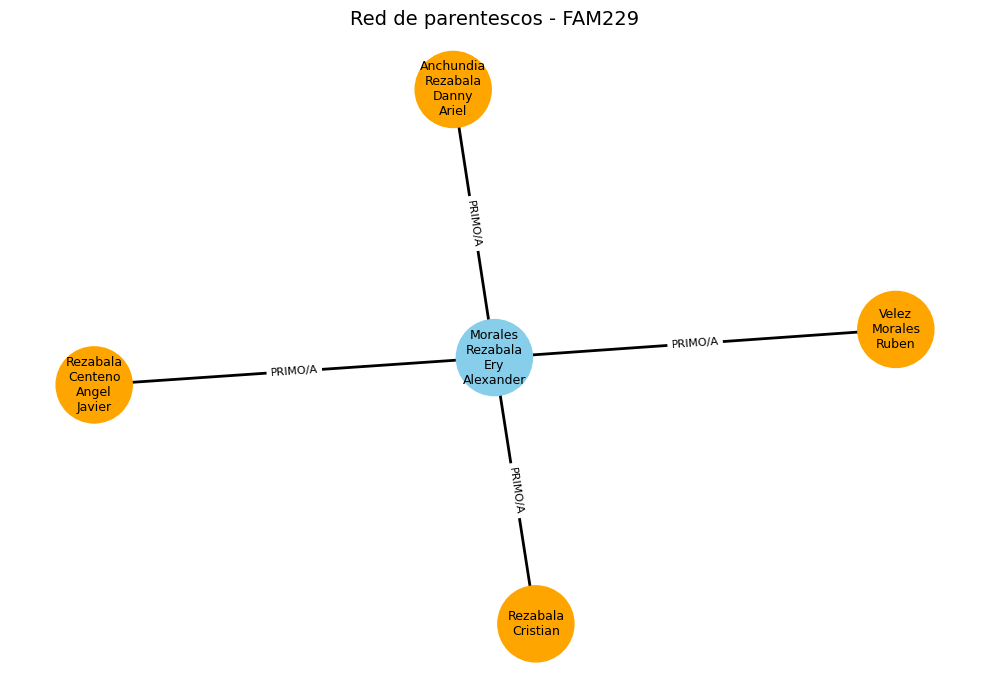

In [60]:
# ---------- 1. Cargar datos ----------
df_familias = pd.read_excel("familias_identificadas_filtradas.xlsx")
df_datos = pd.read_excel("Dataset_Form_Abril.xlsx")

# ---------- 2. Parámetro de entrada ----------
familia_a_graficar = "FAM229"  #nombre de familia

# ---------- 3. Filtrar los integrantes de la familia ----------
fila = df_familias[df_familias["Identificador de familiar"] == familia_a_graficar].iloc[0]
integrantes = [x.strip() for x in fila["Familia"].split(",")]

# Normalización auxiliar
def normalizar(nombre):
    if isinstance(nombre, str):
        return nombre.strip().upper()
    return ""

# Si tienes un diccionario de nombres equivalentes
mapa_normalizado = {}

# ---------- 4. Buscar relaciones dentro de esta familia ----------
G = nx.Graph()
G.add_nodes_from(integrantes)
relaciones = set()  # ← para relaciones declaradas

# Añadir relaciones con tipo de parentesco
for _, row in df_datos.iterrows():
    declarante = normalizar(row["NOMBRES_COLABORADORES"])
    declarante = mapa_normalizado.get(declarante, declarante)

    for i in range(1, 5):
        pariente = normalizar(row.get(f"NOMBRES PARIENTE {i}", ""))
        parentesco = row.get(f"GRADO DE PARENTESCO {i}", "")
        if isinstance(parentesco, str):
            parentesco = parentesco.strip().upper()
        else:
            parentesco = ""

        if pd.notna(pariente) and pariente in integrantes:
            pariente = mapa_normalizado.get(pariente, pariente)
            if pariente in integrantes:
                relaciones.add((declarante, pariente))  # ✅ Guardar relación declarada
                if G.has_edge(declarante, pariente):
                    actual = G[declarante][pariente]["label"]
                    if parentesco and parentesco not in actual:
                        G[declarante][pariente]["label"] = f"{actual}, {parentesco}"
                else:
                    G.add_edge(declarante, pariente, label=parentesco)

    for i in range(1, 9):
        pariente = normalizar(row.get(f"NOMBRES PARIENTE ADICIONAL {i}", ""))
        parentesco = row.get(f"GRADO DE PARENTESCO ADICIONAL {i}", "")
        if isinstance(parentesco, str):
            parentesco = parentesco.strip().upper()
        else:
            parentesco = ""

        if pd.notna(pariente) and pariente in integrantes:
            pariente = mapa_normalizado.get(pariente, pariente)
            if pariente in integrantes:
                relaciones.add((declarante, pariente))  # ✅ Guardar relación declarada
                if G.has_edge(declarante, pariente):
                    actual = G[declarante][pariente]["label"]
                    if parentesco and parentesco not in actual:
                        G[declarante][pariente]["label"] = f"{actual}, {parentesco}"
                else:
                    G.add_edge(declarante, pariente, label=parentesco)

# ---------- 5. Identificar relaciones no recíprocas ----------
no_reciprocos = set()
for r in relaciones:
    if r[::-1] not in relaciones:
        no_reciprocos.add(r[0])  # El que declaró unidireccionalmente

# ---------- 6. Visualización ----------
# Preparar colores y etiquetas
node_colors = []
labels = {}
for node in G.nodes():
    label = "\n".join(node.title().split())  # Dos líneas
    labels[node] = label
    if node in no_reciprocos:
        node_colors.append("skyblue")  # Nodo no recíproco
    else:
        node_colors.append("orange")  # Nodo normal

# Dibujar
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000)
nx.draw_networkx_edges(G, pos, width=2)

# Etiquetas dentro de nodos
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, verticalalignment='center', horizontalalignment='center')

# Etiquetas de las aristas (parentescos)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title(f"Red de parentescos - {familia_a_graficar}", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


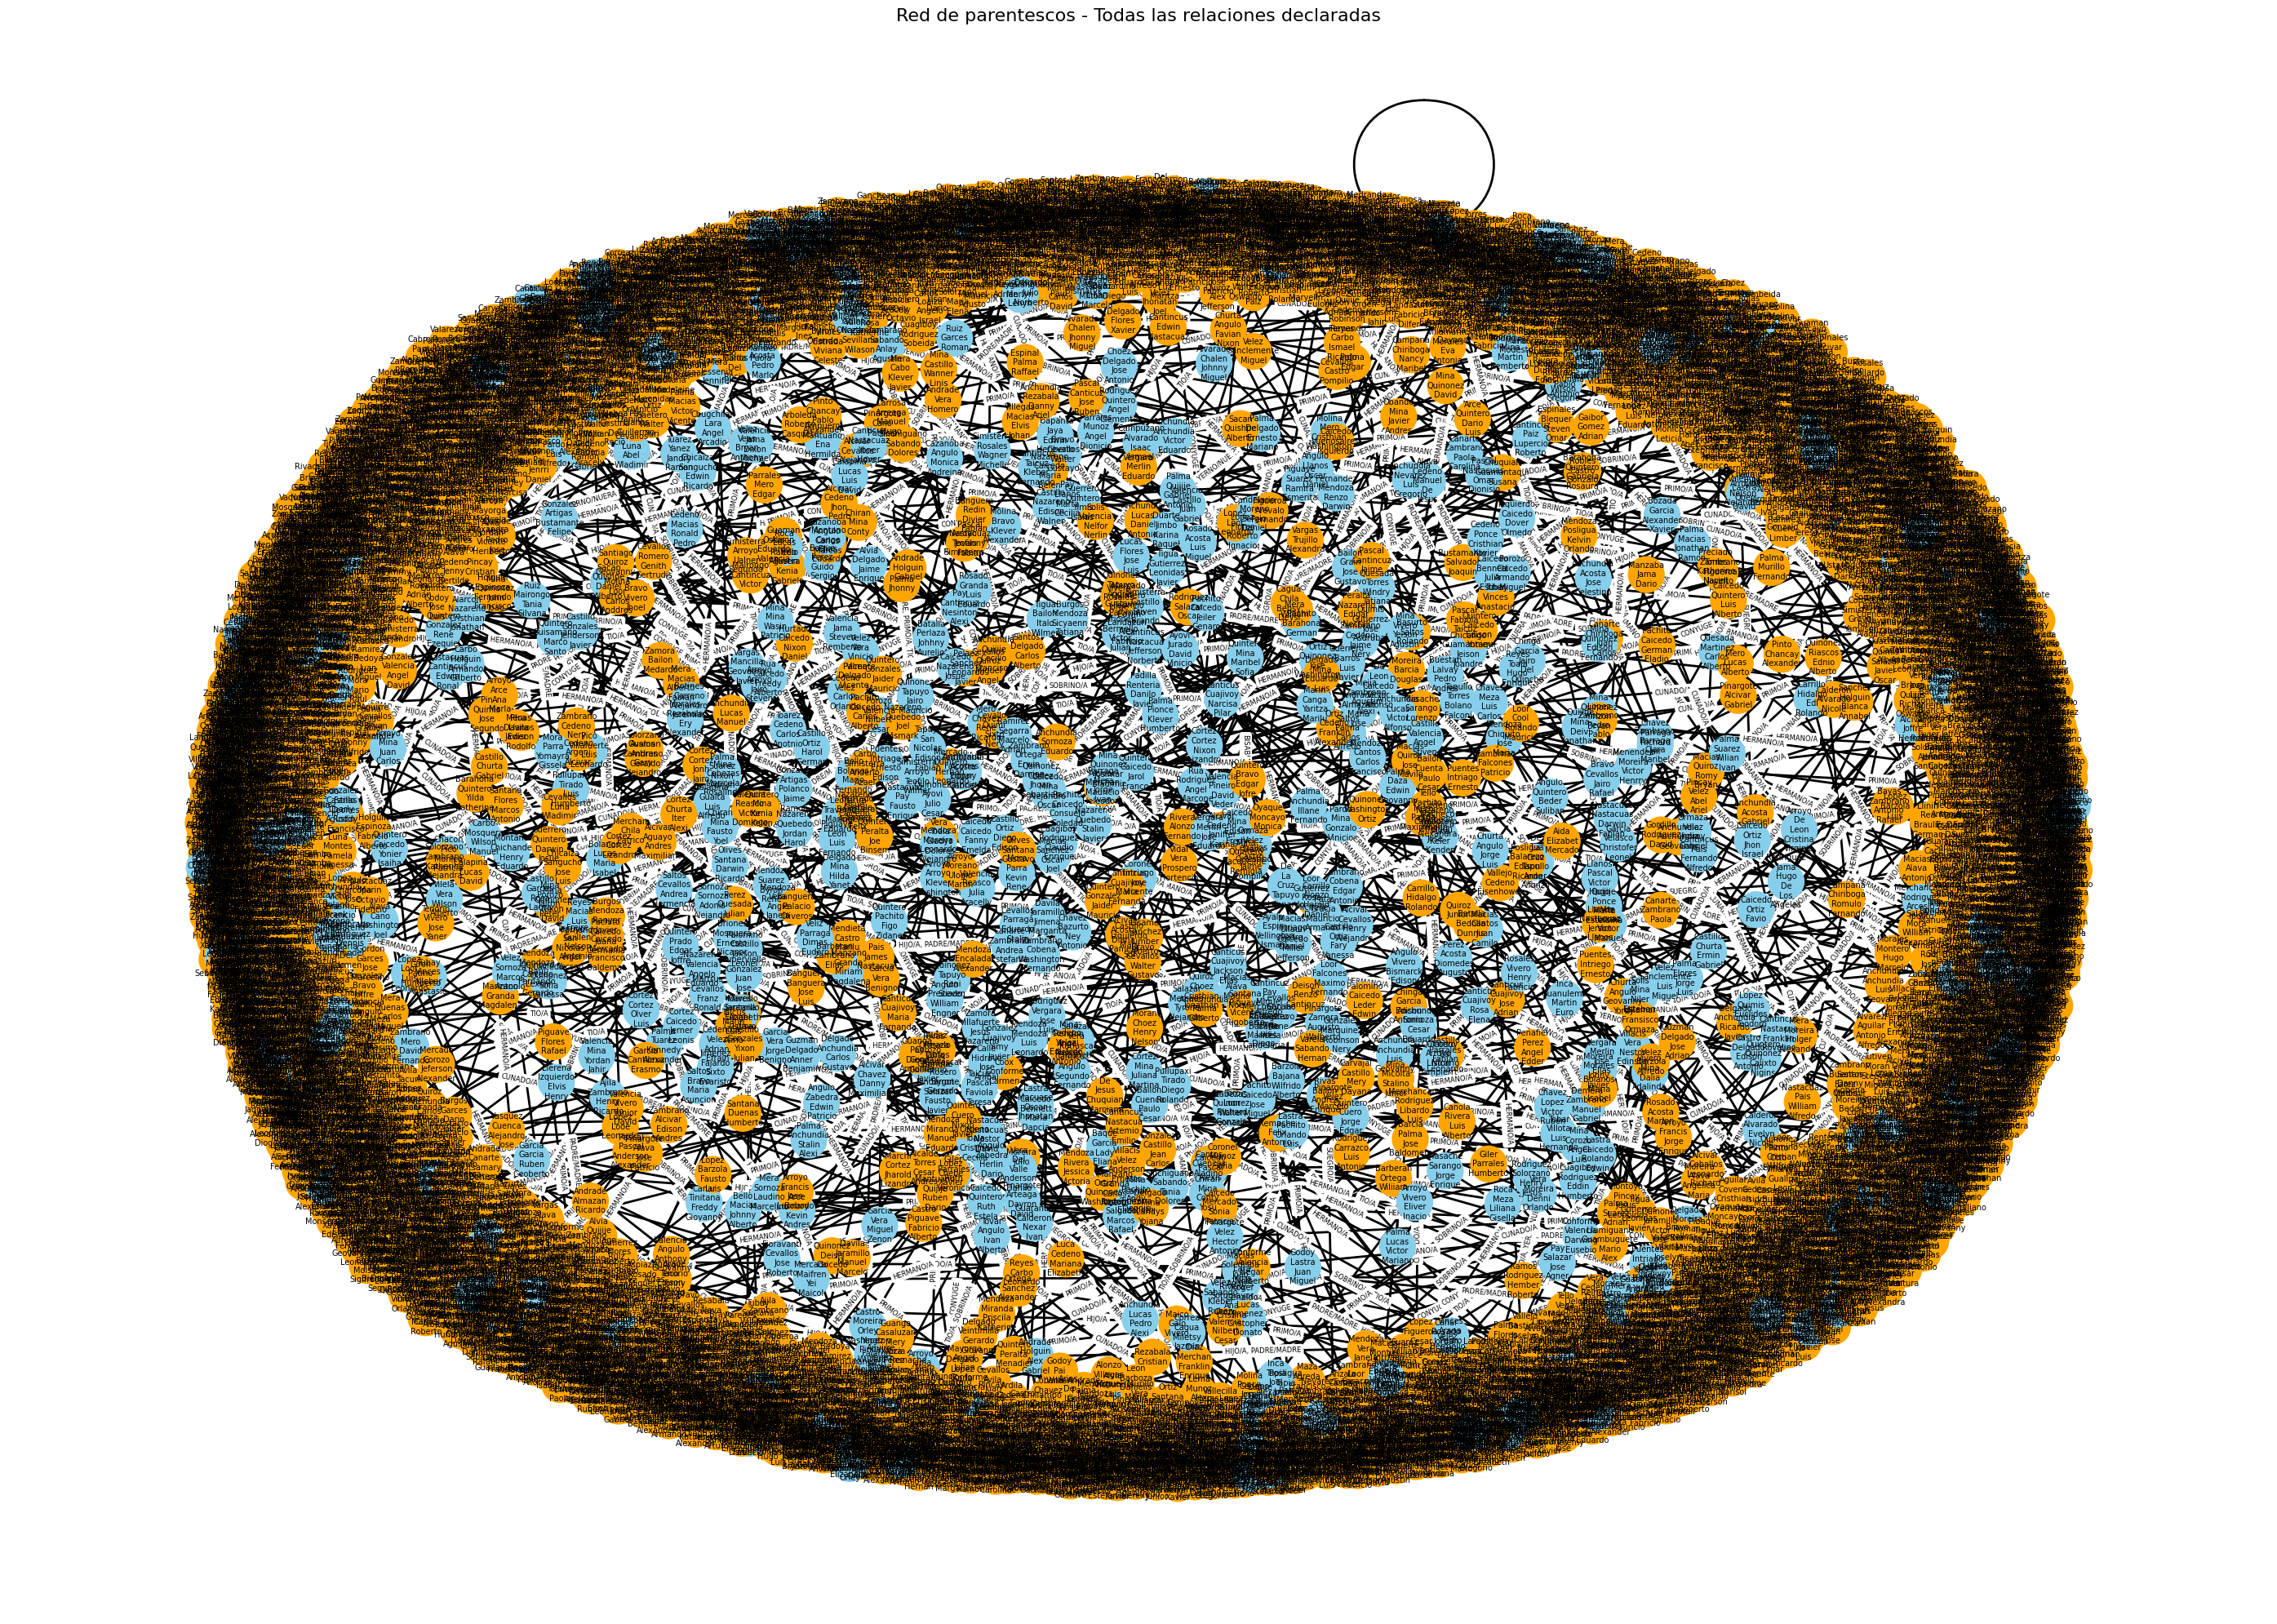

In [ ]:
# ---------- 1. Cargar datos ----------
df_datos = pd.read_excel("Dataset_Form_Abril.xlsx")

# ---------- 2. Normalización ----------
def normalizar(nombre):
    if isinstance(nombre, str):
        return nombre.strip().upper()
    return ""

mapa_normalizado = {}  # Si tienes un diccionario de equivalencias, úsalo aquí

# ---------- 3. Crear grafo global ----------
G = nx.Graph()
relaciones = set()

# ---------- 4. Añadir nodos y relaciones ----------
for _, row in df_datos.iterrows():
    declarante = normalizar(row["NOMBRES_COLABORADORES"])
    declarante = mapa_normalizado.get(declarante, declarante)
    G.add_node(declarante)

    # Parientes principales
    for i in range(1, 5):
        pariente = normalizar(row.get(f"NOMBRES PARIENTE {i}", ""))
        parentesco = row.get(f"GRADO DE PARENTESCO {i}", "")
        parentesco = parentesco.strip().upper() if isinstance(parentesco, str) else ""

        if pd.notna(pariente) and pariente:
            pariente = mapa_normalizado.get(pariente, pariente)
            G.add_node(pariente)
            relaciones.add((declarante, pariente))
            if G.has_edge(declarante, pariente):
                actual = G[declarante][pariente]["label"]
                if parentesco and parentesco not in actual:
                    G[declarante][pariente]["label"] = f"{actual}, {parentesco}"
            else:
                G.add_edge(declarante, pariente, label=parentesco)

    # Parientes adicionales
    for i in range(1, 9):
        pariente = normalizar(row.get(f"NOMBRES PARIENTE ADICIONAL {i}", ""))
        parentesco = row.get(f"GRADO DE PARENTESCO ADICIONAL {i}", "")
        parentesco = parentesco.strip().upper() if isinstance(parentesco, str) else ""

        if pd.notna(pariente) and pariente:
            pariente = mapa_normalizado.get(pariente, pariente)
            G.add_node(pariente)
            relaciones.add((declarante, pariente))
            if G.has_edge(declarante, pariente):
                actual = G[declarante][pariente]["label"]
                if parentesco and parentesco not in actual:
                    G[declarante][pariente]["label"] = f"{actual}, {parentesco}"
            else:
                G.add_edge(declarante, pariente, label=parentesco)

# ---------- 5. Identificar relaciones no recíprocas ----------
no_reciprocos = set()
for r in relaciones:
    if r[::-1] not in relaciones:
        no_reciprocos.add(r[0])

# ---------- 6. Visualización ----------
node_colors = []
labels = {}
for node in G.nodes():
    label = "\n".join(node.title().split())
    labels[node] = label
    if node in no_reciprocos:
        node_colors.append("skyblue")
    else:
        node_colors.append("orange")

plt.figure(figsize=(28, 20))  # Tamaño grande
pos = nx.spring_layout(G, seed=42, k=0.25)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=7)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Red de parentescos - Todas las relaciones declaradas", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()
